In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge


In [3]:
ds=pd.read_csv("Untitled spreadsheet - NSE-TATAGLOBAL.csv")
print(ds)

            Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  3423509          7999.55  
...

In [4]:
print(ds.head())

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1  2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2  2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
3  2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
4  2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   

   Turnover (Lacs)  
0          7162.35  
1         11859.95  
2          5248.60  
3          5503.90  
4          7999.55  


In [5]:
print(ds.tail())

            Date   Open    High     Low    Last   Close  Total Trade Quantity  \
2030  2010-07-27  117.6  119.50  112.00  118.80  118.65                586100   
2031  2010-07-26  120.1  121.00  117.10  117.10  117.60                658440   
2032  2010-07-23  121.8  121.95  120.25  120.35  120.65                281312   
2033  2010-07-22  120.3  122.00  120.25  120.75  120.90                293312   
2034  2010-07-21  122.1  123.00  121.05  121.10  121.55                658666   

      Turnover (Lacs)  
2030           694.98  
2031           780.01  
2032           340.31  
2033           355.17  
2034           803.56  


In [6]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB
None


In [7]:
print(ds.describe())

              Open         High          Low         Last       Close  \
count  2035.000000  2035.000000  2035.000000  2035.000000  2035.00000   
mean    149.713735   151.992826   147.293931   149.474251   149.45027   
std      48.664509    49.413109    47.931958    48.732570    48.71204   
min      81.100000    82.800000    80.000000    81.000000    80.95000   
25%     120.025000   122.100000   118.300000   120.075000   120.05000   
50%     141.500000   143.400000   139.600000   141.100000   141.25000   
75%     157.175000   159.400000   155.150000   156.925000   156.90000   
max     327.700000   328.750000   321.650000   325.950000   325.75000   

       Total Trade Quantity  Turnover (Lacs)  
count          2.035000e+03      2035.000000  
mean           2.335681e+06      3899.980565  
std            2.091778e+06      4570.767877  
min            3.961000e+04        37.040000  
25%            1.146444e+06      1427.460000  
50%            1.783456e+06      2512.030000  
75%          

In [10]:
print(ds.dtypes)

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object


In [11]:
print(ds.columns)

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')


In [14]:
print(ds.shape)

(2035, 8)


In [15]:
print(ds.nunique())

Date                    2035
Open                    1165
High                    1257
Low                     1263
Last                    1268
Close                   1313
Total Trade Quantity    2034
Turnover (Lacs)         2030
dtype: int64


In [16]:
print(ds.isna().sum())

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64


In [17]:
x=ds.iloc[:,1:-1].values
y=ds.iloc[:,-1].values

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [19]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
DICISION TREE

In [20]:
dr=DecisionTreeRegressor()
dr=dr.fit(x_train,y_train)
y_pred=dr.predict(x_test)
print(r2_score(y_test,y_pred))



0.8663003445177462


In [21]:
rf=RandomForestRegressor(n_estimators=10)
rf=rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(r2_score(y_test,y_pred))

0.9303454170500137


In [ ]:
SVM

In [23]:
sv=SVR()
sv=sv.fit(x_train,y_train)
print(r2_score(y_test,y_pred))

0.9303454170500137


In [ ]:
Navive Bayes

In [25]:
BR=BayesianRidge()
BR2=BR.fit(x_train,y_train)
y_pred=BR2.predict(x_test)
print(r2_score(y_test,y_pred))

0.9204972277676888


In [ ]:
FEATURE IMPORTANCE

In [26]:
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print("feature : %0d , Score : %.5f"%(i,v))

feature : 0 , Score : 0.01893
feature : 1 , Score : 0.02566
feature : 2 , Score : 0.02274
feature : 3 , Score : 0.01774
feature : 4 , Score : 0.03026
feature : 5 , Score : 0.88467


<Axes: >

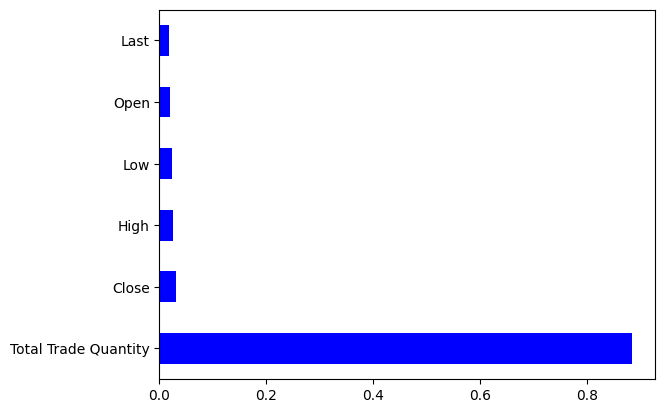

In [28]:
index=ds.columns[1:-1]
importance=pd.Series(rf.feature_importances_,index=index)
importance.nlargest(6).plot(kind="barh",colormap="winter")

In [ ]:
PREDICTION

In [29]:
print(rf.predict(sc.transform([[234.55, 234.60, 221.05, 230.30, 230.90, 1534749.0]])))

[3721.6]
